In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing data

In [3]:
data =  pd.read_csv('Titanic_Dataset.csv')
data

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


## Plotting data

Text(0.5, 0, 'Sex')

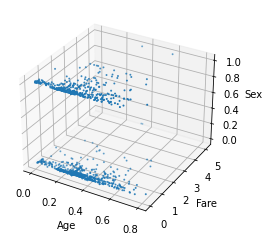

In [4]:
x1 = data['Age'].values/100
x2 = data['Fare'].values/100
y = data['Sex'].values
ax = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y , s=1)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Sex')

## Sigmoid Function

In [5]:
def sigmoid_function(z):
    return .5 * (1 + np.tanh(.5 * z))
    #return (1/(1+np.exp(-z)))

## Hypothesis Function

In [6]:
def hypothesis(X, theta):
    return np.dot(X, theta)

## Cost Function

In [7]:
def cost_function(X, Y, theta):
    infunc = -Y*(np.log(sigmoid_function(hypothesis(X, theta)))) - (1-Y)*(np.log(1-sigmoid_function(hypothesis(X, theta))))
    return np.sum(infunc)/len(Y)

## Gradient Decent Function

In [8]:
def gradient_decent_function(X, Y, alpha, iterations):
    theta = np.zeros(len(X[0]))
    m = len(Y)
#     hypothesis_z = np.zeros(iterations)
#     sigmoid_function_s = np.zeros(iterations)
    for _ in range(iterations):
        z = hypothesis(X, theta)
        s = sigmoid_function(z)
#         hypothesis_z[i] = z
#         sigmoid_function_s[i] = s
        t0 = theta[0] - (alpha/m) * np.sum((s-Y))
        t1 = theta[1] - (alpha/m) * np.sum((s-Y) * X[:,1])
        t2 = theta[2] - (alpha/m) * np.sum((s-Y) * X[:,2])
        theta =  np.array([t0 , t1, t2])
    return theta

## Getting theta values from Gradient Decent Function 

[-0.45640548 -1.48914193  0.88907612]
0.6296402485068003


Text(0, 0.5, 's')

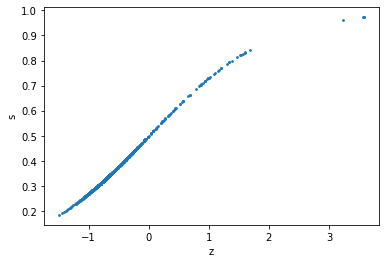

In [14]:
iterations = 10000
alpha = 0.1
X = np.column_stack((np.ones(len(x1)), x1, x2))
Y = y
theta = gradient_decent_function(X, Y, alpha, iterations)
print(theta)
print(cost_function(X, Y, theta))
z = hypothesis(X, theta)
s = sigmoid_function(z)
plt.scatter(z, s, s=3)
plt.xlabel('z')
plt.ylabel('s')

## Plotting required plane on the graph

In [ ]:
ax = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y , s=1, color='black')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Z')
samples1 = np.linspace(min(x1), max(x1))
samples2 = np.linspace(min(x2), max(x2))
samples11, samples22 = np.meshgrid(samples1,samples2)
Z = theta[0] + theta[1] * samples11 + theta[2] * samples22
ax.plot_surface(samples11, samples22, Z)
ax.set_zlim(0,1)
ax.view_init(10,0)

In [15]:
count = 0
for i in range(len(y)):
    age = x1[i]
    fare = x2[i]
    result = 0
    if theta[0] + theta[1] * age + theta[2] * fare > 0:
        result = 1
    if result != y[i]:
        count = count + 1
print(count*100/len(y), 'percent wrong prediction for training set')

33.91902215431627 percent wrong prediction for training set
